/home/driffyn/anaconda3/envs/phys4684/lib/python3.11/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


       Size    Weight  Sweetness  Softness  HarvestTime  Ripeness   Acidity  \
0 -1.924968  0.468078   3.077832 -1.472177     0.294799  2.435570  0.271290   
1 -2.409751  0.486870   0.346921 -2.495099    -0.892213  2.067549  0.307325   
2 -0.357607  1.483176   1.568452 -2.645145    -0.647267  3.090643  1.427322   
3 -0.868524  1.566201   1.889605 -1.273761    -1.006278  1.873001  0.477862   
4  0.651825  1.319199  -0.022459 -1.209709    -1.430692  1.078345  2.812442   

  Quality  
0    Good  
1    Good  
2    Good  
3    Good  
4    Good  
X shape: (8000, 2), Y shape: (8000,)
X_norm shape: (8000, 4)
Features shape: (8000, 5)
X_norm[0]: [0.30441415 0.81514448 0.34847633 0.34847633]
Features[0]: [ 1.03065524 -0.78539816  0.78539816 -1.21338692  1.21338692]
Plotting the data


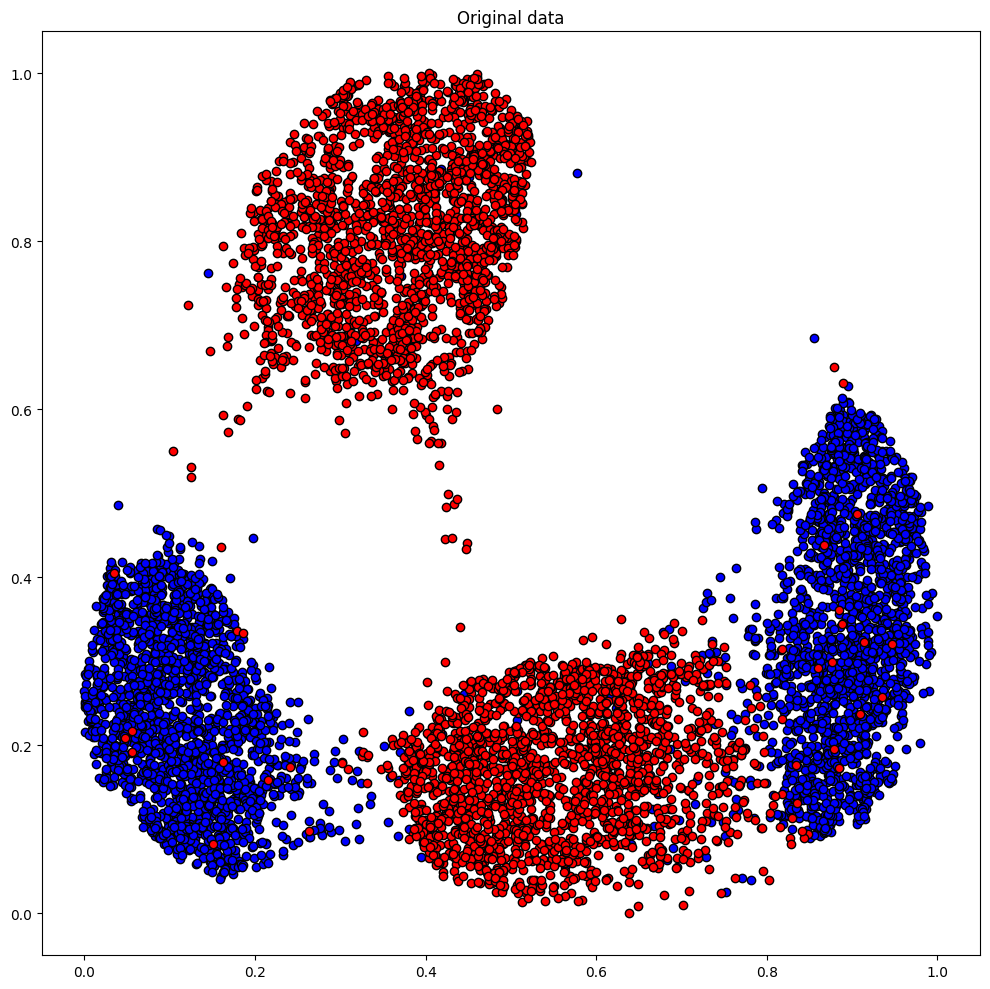

Plotting the padded and normalised data


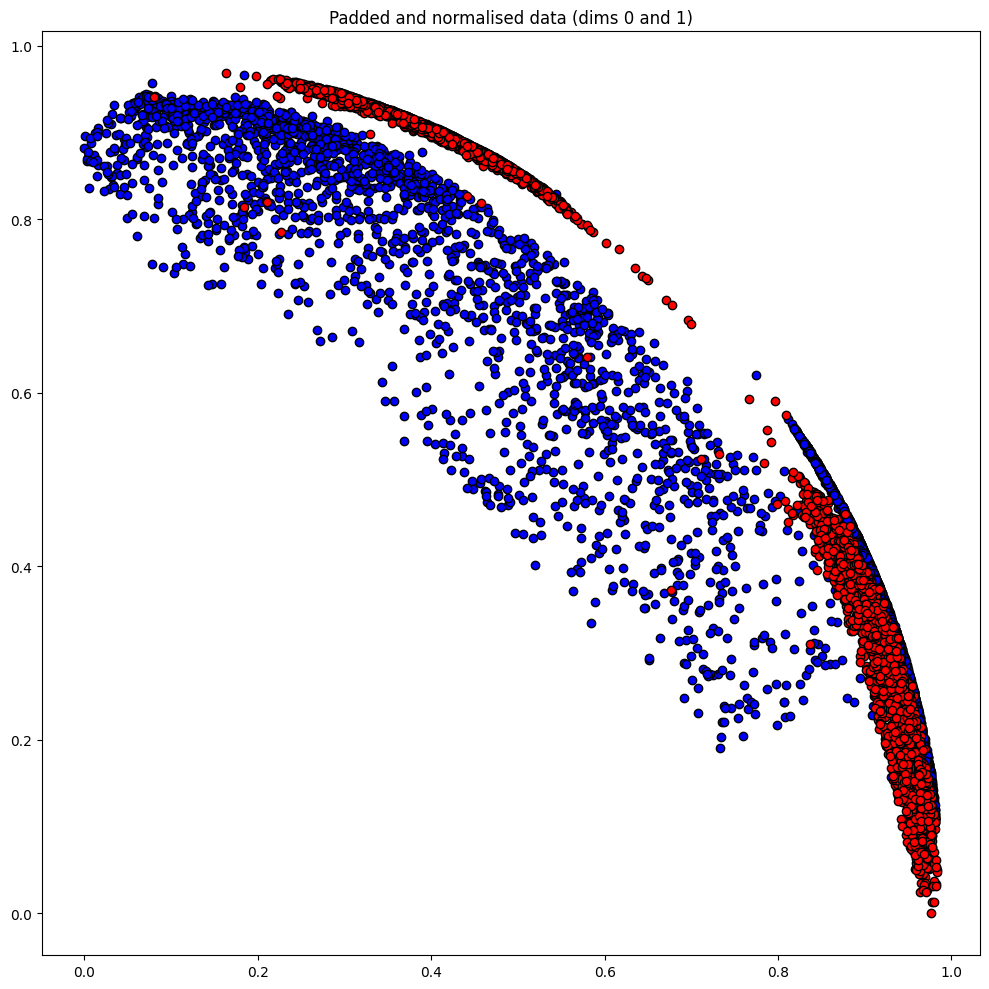

Plotting the feature vectors


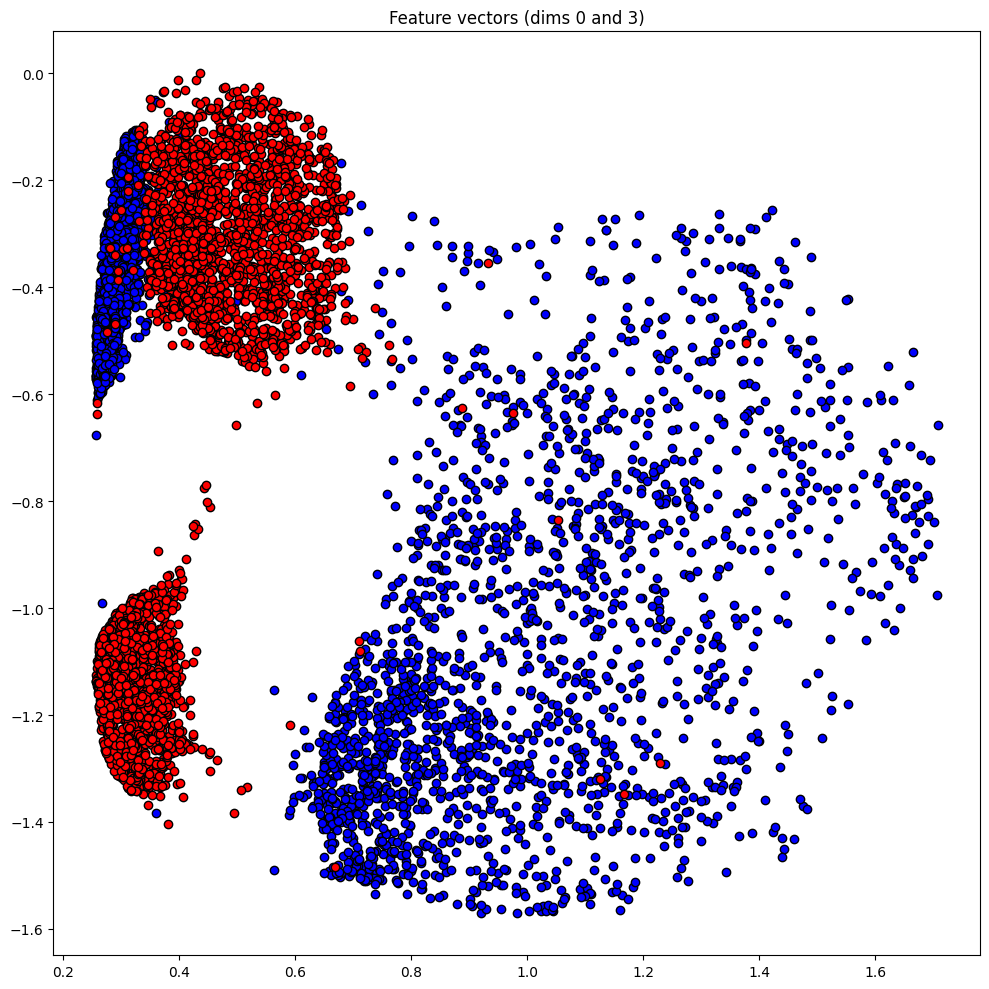

Iter:     2 | Cost: 2.9121964 | Acc train: 0.4900000 | Acc validation: 0.5168750
Iter:     4 | Cost: 1.1451133 | Acc train: 0.4900000 | Acc validation: 0.5168750
Iter:     6 | Cost: 1.0418809 | Acc train: 0.5425000 | Acc validation: 0.5375000
Iter:     8 | Cost: 1.7794218 | Acc train: 0.5100000 | Acc validation: 0.4831250
Iter:    10 | Cost: 1.1013633 | Acc train: 0.5170833 | Acc validation: 0.4934375
Final weights: [[[-5.14652074e-03 -9.11676681e-02  1.63309212e-03]
  [-2.74288468e-02 -2.75208056e-01 -3.88074001e-02]]

 [[ 9.11118241e-03  1.92003790e-01  1.75269638e-02]
  [-6.45151041e-02 -2.05417606e-01 -3.90164615e-02]]

 [[ 1.75131545e-02 -7.57239002e-02  2.43910704e-03]
  [-1.86806474e-02 -1.43214831e-01 -6.37643643e-03]]

 [[-1.94346772e-04  2.03620290e-01  5.69604248e-04]
  [-2.21637873e-02 -1.19793375e-01 -2.29378059e-02]]

 [[ 2.28618992e-03 -8.49049180e-02  1.67458414e-02]
  [-3.73210745e-03 -9.60888075e-03  8.08317007e-03]]]
Final bias: 0.5683956162407724


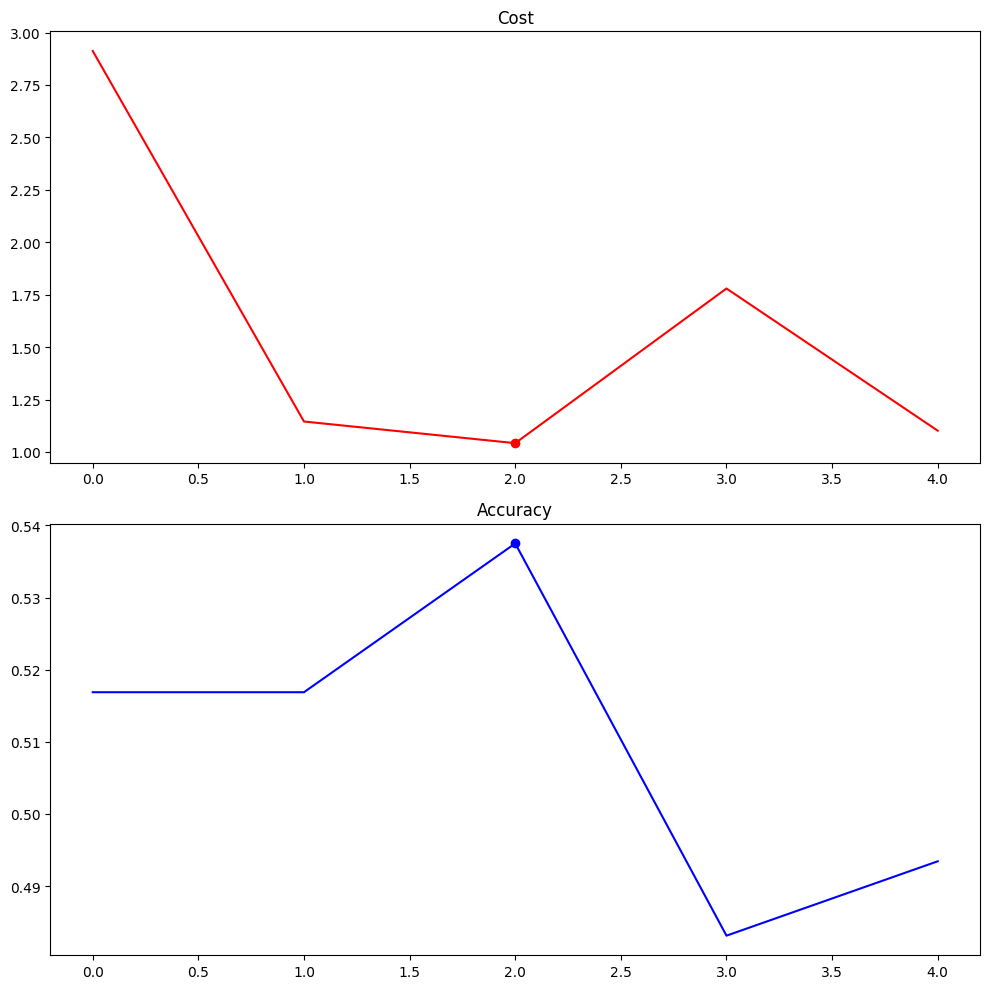

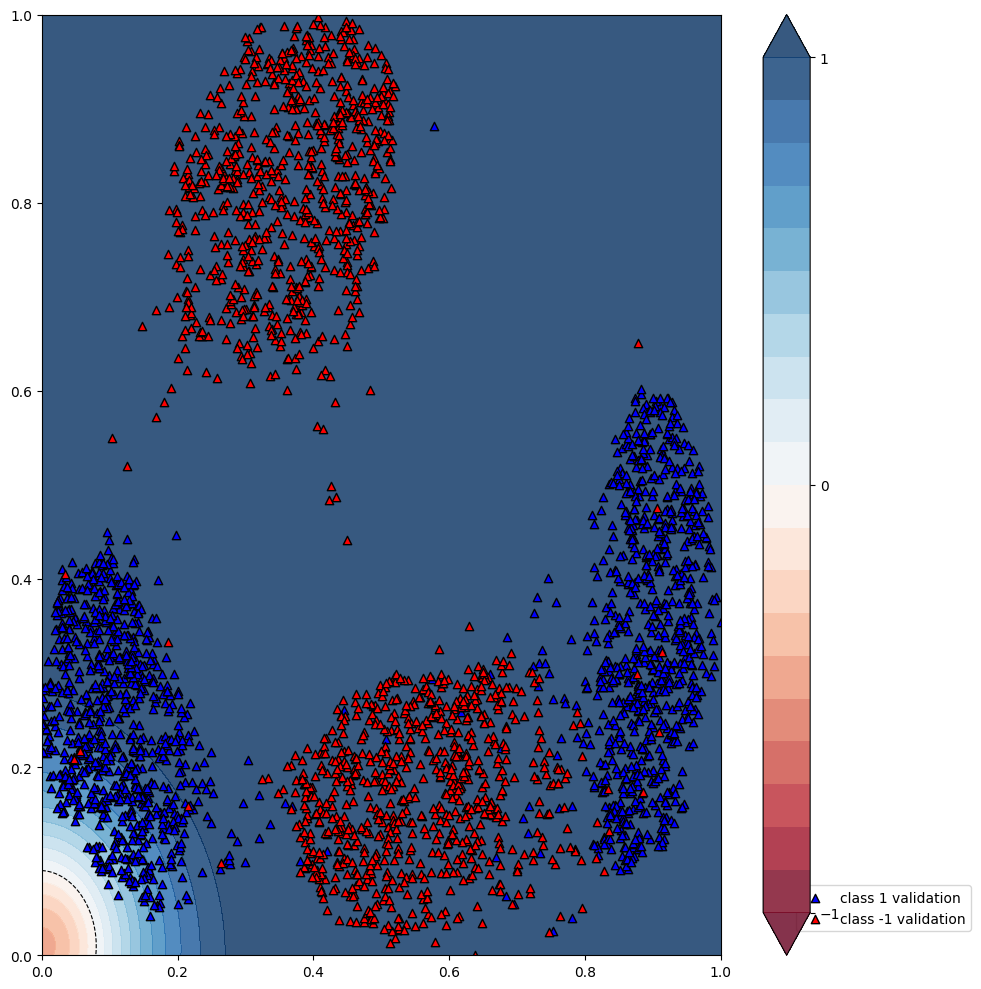

In [1]:
import qml
qml.main()

In [1]:

METHODS = [['q', 'qiskit'], ['p', 'pennylane'], ['c', '']]

In [2]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder


# do SVM classification
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# do t-SNE to visualize the data
from sklearn.manifold import TSNE

import trimap

In [3]:
banana_df = pd.read_csv('data/banana_quality.csv')
banana_df.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


In [8]:
banana_df_y = banana_df['Quality']
banana_df_X = banana_df.drop('Quality', axis=1)
banana_df_X.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442


In [11]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [14]:
embedding = trimap.TRIMAP().fit_transform(banana_df_X.to_numpy())
embedding

array([[-37.774345 , -10.278255 ],
       [-30.79551  , -17.829836 ],
       [-42.528038 , -16.057602 ],
       ...,
       [ -1.1553311,  40.723755 ],
       [ -4.992946 ,  33.692665 ],
       [-13.324389 ,  29.281565 ]], dtype=float32)

In [21]:
# convert y to a catalogical variable
banana_df_y = banana_df_y.astype('category')

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0       Good
1       Good
2       Good
3       Good
4       Good
        ... 
7995     Bad
7996     Bad
7997     Bad
7998     Bad
7999     Bad
Name: Quality, Length: 8000, dtype: category
Categories (2, object): ['Bad', 'Good']

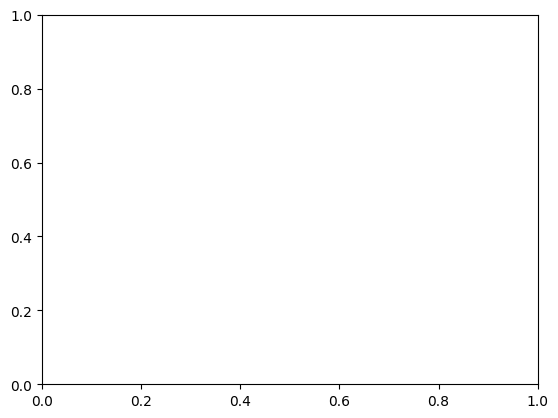

In [22]:
#plot embedding
plt.scatter(embedding[:, 0], embedding[:, 1], c=banana_df_y, cmap='viridis')


In [ ]:
# display what the circuit looks like
# TODO  

In [29]:
# X, Y, weights_init=None, bias_init=None, 
                # steps=100,
                # batch_size=5,
                # isPlot=False, isDebug=False):
banana_df_X_q = qX(banana_df_X)
apply_model(banana_df_X_q, banana_df_y, steps=100, batch_size=5, isPlot=True, isDebug=False)

KeyError: 'Good'

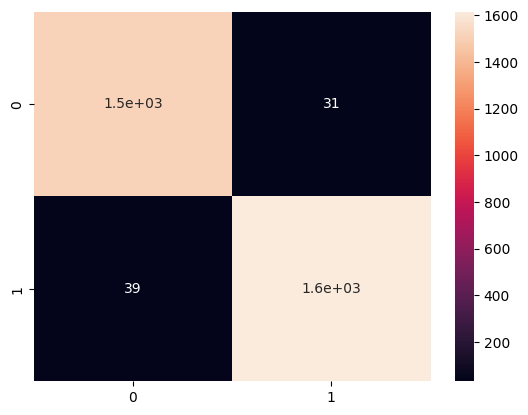

Accuracy: 0.978125
Support Vectors: 357
Number of Support Vectors for each class: [180 177]


In [49]:
# do a train test split
train_X, test_X, train_y, test_y = train_test_split(banana_df_X, banana_df_y, test_size=0.4, random_state=42)

clf = SVC()
clf.fit(train_X, train_y)
pred_y = clf.predict(test_X)

# plot the confusion matrix
cm = confusion_matrix(test_y, pred_y)
sns.heatmap(cm, annot=True)
plt.show()

# find the SVM model summary 
print(f"Accuracy: {np.mean(pred_y == test_y)}")
print(f"Support Vectors: {clf.support_vectors_.shape[0]}")
print(f"Number of Support Vectors for each class: {clf.n_support_}")


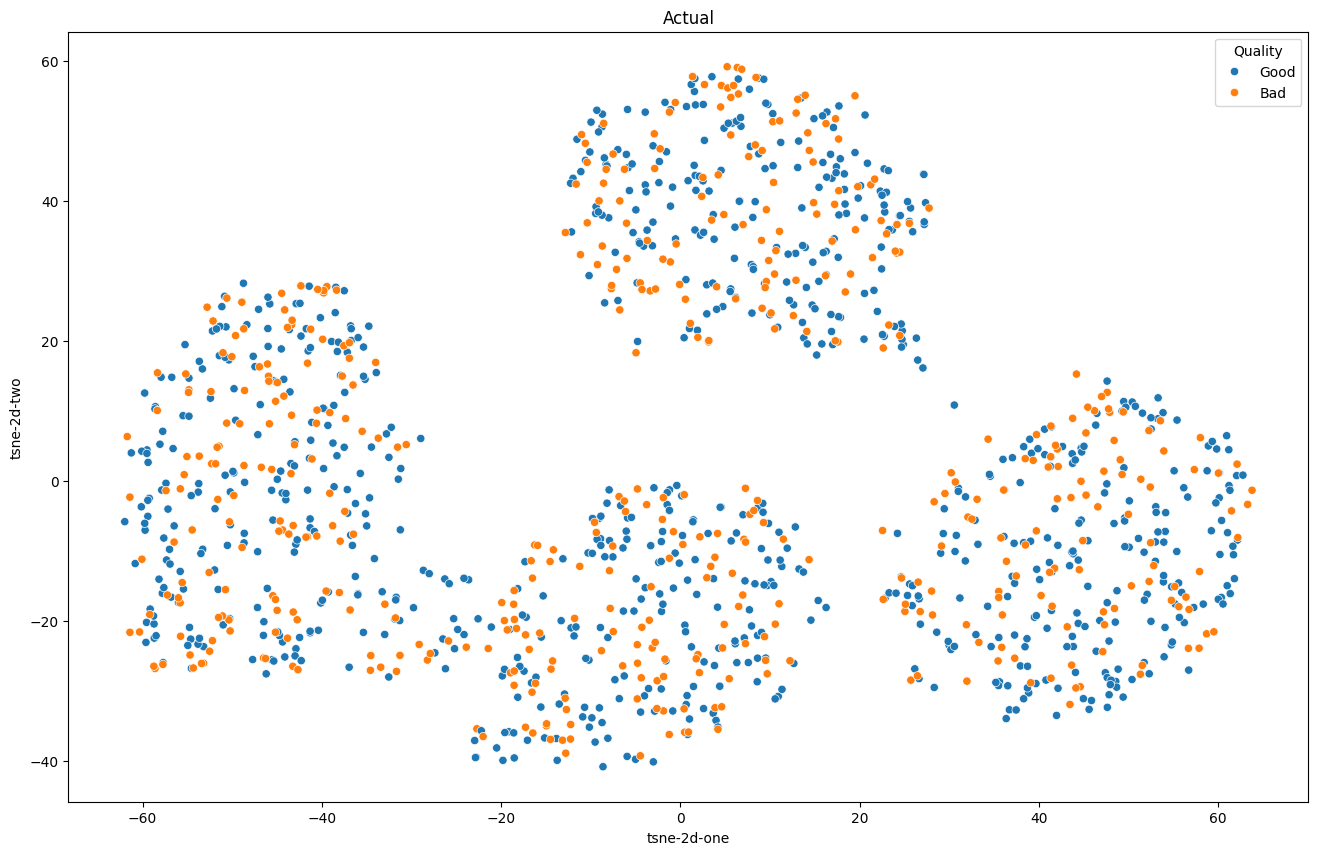

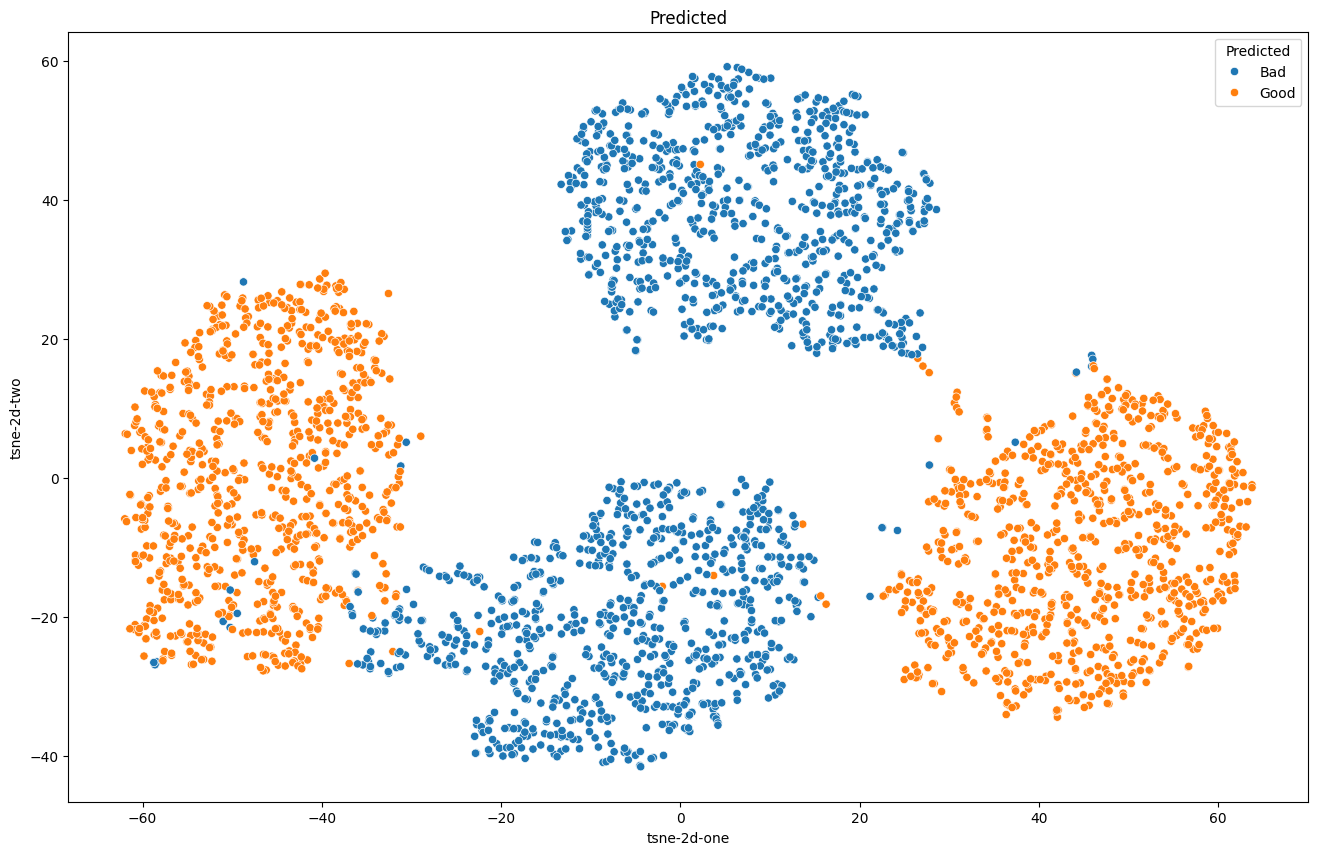

In [39]:
X_embedded = TSNE(n_components=2).fit_transform(test_X)
test_df = pd.DataFrame(X_embedded, columns=['tsne-2d-one', 'tsne-2d-two'])
test_df['Quality'] = test_y
test_df['Predicted'] = pred_y

plt.figure(figsize=(16,10))
sns.scatterplot(test_df, x="tsne-2d-one", y="tsne-2d-two", hue="Quality")
plt.title('Actual')
plt.show()

plt.figure(figsize=(16,10))
sns.scatterplot(test_df, x="tsne-2d-one", y="tsne-2d-two", hue="Predicted")
plt.title('Predicted')
plt.show()


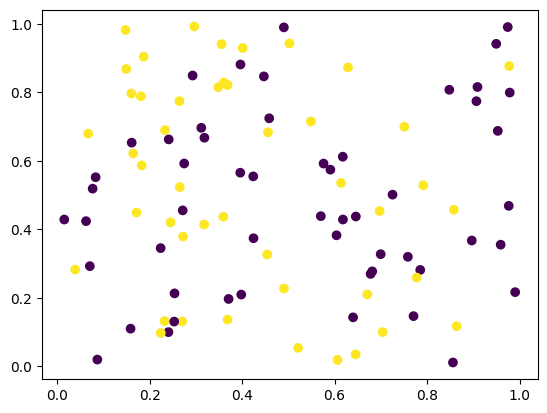

In [24]:
# plot the new 
